---
## Rechnernutzung in der Physik  

**Institut für Experimentelle Teilchenphysik**  
Prof. G. Quast 
Dr. Th. Chwalek  
WS 2024/25 – Blatt 03  
Besprechung: Montag 2.12/ Dienstag 3.12. bzw. Montag 9.12./ Dienstag 10.12.

---

---
# Info-Veranstaltung zur Projektentwicklung Physik am 29.11.
---

Die Bereichsleitung BL5 organisiert am 29.11. um 16.00 Uhr im Gaede-HS eine große Informationsveranstaltung zur Projektentwicklung Physik. Dabei sollen von der Abteilung Planen und Bau die aktuellen Planungen zur baulichen Weiterentwicklung unserer Fakultät vorgestellt werden. Im Anschluss daran besteht die Möglichkeit, dies mit den drei anwesenden KIT-Präsidiumsmitgliedern Präsident Hesthaven, Vizepräsident Kraft und Vizepräsident Schwartze zu diskutieren. 
---



Auf dem dritten Übungsblatt gibt es zunächst eine Anwendung der Monte-Carlo-Methode zur Untersuchung der Poisson-Veteilung.
Anschließend beschäftigen Sie sich mit einem der wichtigsten Grundbegriffe der modernen Parameteranpassung - der Maximum-Likelihood-Methode.  
Sie haben mit großer Wahrscheinlichkeit im Laufe Ihres Studiums oder Privatlebens bereits die Maximum-Likelihood-Methode (oder ihre Abwandlungen) verwendet, um die Steigung einer Geraden oder andere Parameter einer Messung zu bestimmen. Mit diesem Übungsblatt beschäftigen Sie sich noch mal ganz genau mit der Methodik und nehmen hoffentlich mit, auf welchem Prinzip die unterschiedlichen eingebauten Fitfunktionen in *SciPy*, *kafe2*, *probfit* und vielen mehr (ja, auch Excel) aufgebaut sind. Sie werden merken, dass sich hinter all den angesprochenen Methoden keine schwarze Magie befindet, sondern die Umsetzung und Überführung auf eigene Programme ganz einfach ist. Mit einem guten Verständis der Maximum-Likelihood-Methode können Sie dann nicht nur die Methode der kleinsten Quadrate verstehen, sondern auch schon bald Anpassungen wie diese selbst durchführen.

---
# Aufgabe 1: Simulation eines Poisson-Prozesses <a id="Aufgabe1"></a>
---

In dieser Aufgabe soll eine Folge von Zeitpunkten erzeugt werden, zu denen ein Ereignis stattfindet; 
die Eintreffwahrscheinlichkeit pro Zeitintervall ist dabei konstant, d.h. der Prozess findet mit einer 
festen mittleren Rate statt. Solche Prozesse sind in der Physik sehr häufig, z.B. das Eintreffen eines
quantenmechanischen Ereignisses wie die Abstrahlung eines Photons durch ein angeregtes Atom oder 
Zerfälle von Kernen oder Teilchen oder die Zeitpunkte der Erzeugung von Teilchen in einem 
Teilchenbeschleuniger wie dem Large-Hadron-Collider. 

Für die Simulation von Experimenten zur Untersuchung von Poisson-Prozessen ist der Zeitpunkt des 
Ereignisses entscheidend, weil praktisch alle Sensoren zum Nachweis nach einem Ereignis für eine 
gewisse Zeit vollständig oder teilweise ineffizient sind oder ungenaue Ergebnisse liefern. 
Wenn z.B. ein elektrischer Puls einer bestimmten Dauer ausgelöst wird, dann kann kein zweiter 
Puls direkt anschließend fehlerfrei detektiert werden, weil es zu einer Überlagerung kommt. 

In dieser Studie soll zunächst eine Reihe von Zeitpnkten simuliert werden, zu denen Ereignisse 
stattgefunden haben.  Die Voraussetzung einer konstanten Eintreffwahrscheinlichkeit führt  
zu einer Poisson-Verteilung der in festen Zeitintervallen eintreffenden Ereignisse, wie 
im Dokument [Poisson.pdf](Poisson.pdf) illustriert wird.  

Nach einer Überprüfung der erwarteten statistischen Eigenschaften der erzeugten Zeitpunkte
wenden wir sie zur Bestimmung der Nachweiseffizienz und Korrektur für einen einfachen
Detektor an. 


## a) Verteilung der Wartezeiten

Zur Lösung der gestellen Aufgabe gehen wir zunächst von der Verteilung der sogenannten "Wartezeit" 
aus, d.h. der zwischen dem Auftreten von zwei Zufallsereignissen verstrichenen Zeit.

Die Verteilungsdichte der Wartezeiten, $t_w$, zwischen zwei
Ereignissen, die in der Zeit gleichverteilt sind, ist gegeben durch
$f(t_w)=\frac{1}{\overline{t_w}} \exp{(-t_w/\overline{t_w})}\,$, wobei
$\overline{t_w}$ die mittlere Wartezeit ist und dem Kehrwert der
Ereignisrate $R$ entspricht. Also gilt auch $f(t_w)=R \cdot \exp{(- R\,t_w)}$

  > **Herleitung: Verteilung der Wartezeiten**  
    Man denke sich die Zeit $t_w$ in $n$ kleine, gleich große Intervalle
    $\Delta t_i=t_w/n$ zerlegt. Die Wahrscheinlichkeit, ein Ereignis in
    einem solchen Intervall zu beobachten, ist gegeben durch
    $p=R\,t_w\,/n$. Ein Zerfall nach der Zeit $t_w$ bedeutet, dass in den
    Intervallen davor kein Ereignis beobachtet wurde, d.h.
    $p(t_w) = (1 - \, Rt_w/n)^n$, für $n \to\infty$ also $p(t_w) =\exp(-Rt_w)$.


Nutzen Sie diese Verteilung der Wartezeiten und schreiben Sie eine
Funktion, die, ausgehend von $t_0=0$, eine Folge von $N$=50'000
Zeitpunkten $t_i$ bestimmt, zu denen solche Ereignisse auftreten. Der
Einfachheit halber sei die Rate $R$\,=\,1/Zeiteinheit (ZE). 

Histogrammieren Sie zur Kontrolle die Zeiten zwischen
aufeinanderfolgenden Ereignissen und überlagern Sie zur Kontrolle 
die Exponentialfunktion.

Als kleine Erleichterung hier einige Funktionen aus den Vorlesungsbeispielen:

In [1]:
# imports and helper functions
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp


## Poisson-Verteilung aus Vorlesungsbeispielen
# ---------------------------------------
# Poisson distribution
def fPoisson(x, mu):
    k = np.around(x)
    #  return (mu**k)/np.exp(mu)/sp.gamma(k+1.)
    return np.exp(k * np.log(mu) - mu - sp.gammaln(k + 1.0))  # numerically more robust


## Funktion aus PhyPraKit
# ---------------------------------------
def histstat(binc, bine, pr=True):
    # calculate mean and standard deviation of a histogram 
    #  with bincontents binc and bin edges bine
    bincent = (bine[1:] + bine[:-1]) / 2  # determine bincenters
    mean = sum(binc * bincent) / sum(binc)
    rms = np.sqrt(sum(binc * bincent**2) / sum(binc) - mean**2)
    if pr:
        print('hist statistics:\n' '   mean=%g, sigma=%g\n' % (mean, rms))
    return mean, rms

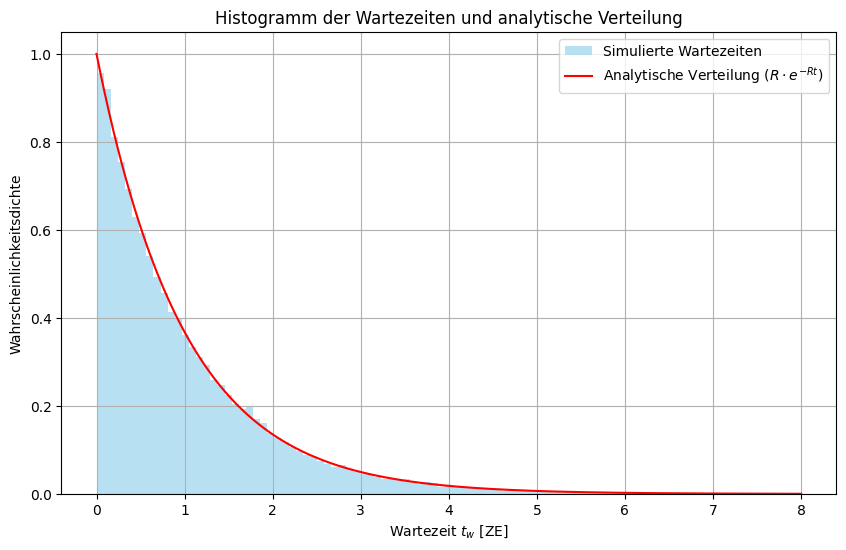

hist statistics:
   mean=0.998176, sigma=0.989006



In [2]:
# --> Code zur Erzeugung der Zeitpunkte

Nevents = 50000
data = np.zeros(Nevents)
dT = 1.0  # mean time between signal events
R = 1.0 # Ereignisrate

# generate event times (signal)
del_times = np.random.exponential(scale=dT, size=Nevents)
data = np.cumsum(del_times)

# plot time between events
plt.figure(figsize=(10, 6))

bins = np.linspace(0, 8, 100)
hist, bin_edges, _ = plt.hist(del_times, bins=bins, density=True, alpha=0.6, label="Simulierte Wartezeiten", color='skyblue')

# analitical distribution
t_vals = np.linspace(0, 8, 500)
analytical = R * np.exp(-R * t_vals)
plt.plot(t_vals, analytical, 'r-', label="Analytische Verteilung ($R \\cdot e^{-R t}$)")

# Formatierung
plt.title("Histogramm der Wartezeiten und analytische Verteilung")
plt.xlabel("Wartezeit $t_w$ [ZE]")
plt.ylabel("Wahrscheinlichkeitsdichte")
plt.legend()
plt.grid()
plt.show()

# Histogrammstatistik
mean, sigma = histstat(hist, bin_edges)



## b) Statistische Auswertung

(1) Histogrammieren Sie die Häufigkeit von Ereignissen in festen Zeitintervallen, d.h. 
stellen Sie die zeitliche Verteilung der Ereigniszeipunkte in einem Histogramm mit
500 Bins dar. 
 
Welche Verteilung erhalten Sie? Welche Ereignisrate/Bin lesen Sie ab? Zeichen Sie 
auch die erwartete mittlere Rate ein. 

(2) Sellen Sie nun die Anzahlen der in den 500 Intervallen beobachteten Ereignisse,
d.h. die Bin-Inhalte aus (1), als Häufikeitsverteilung dar und überlagern Sie zum 
Vergleich die Poission-Verteilung.


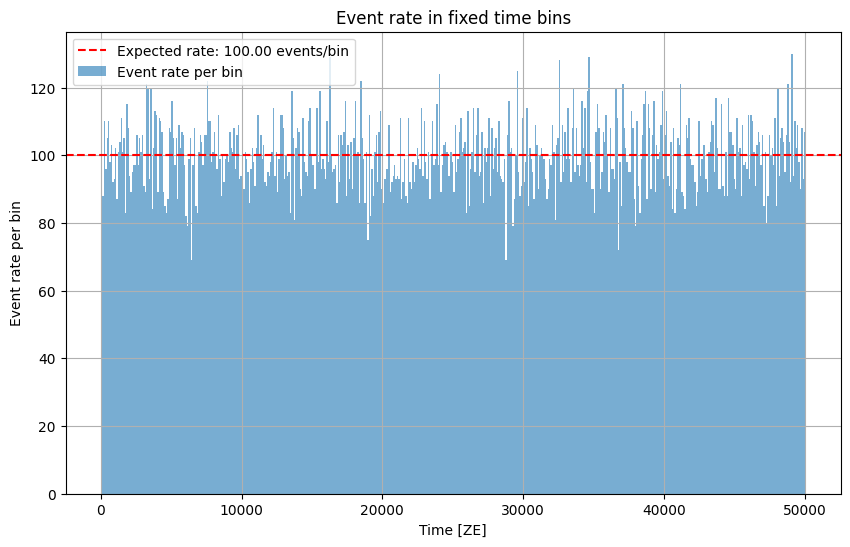

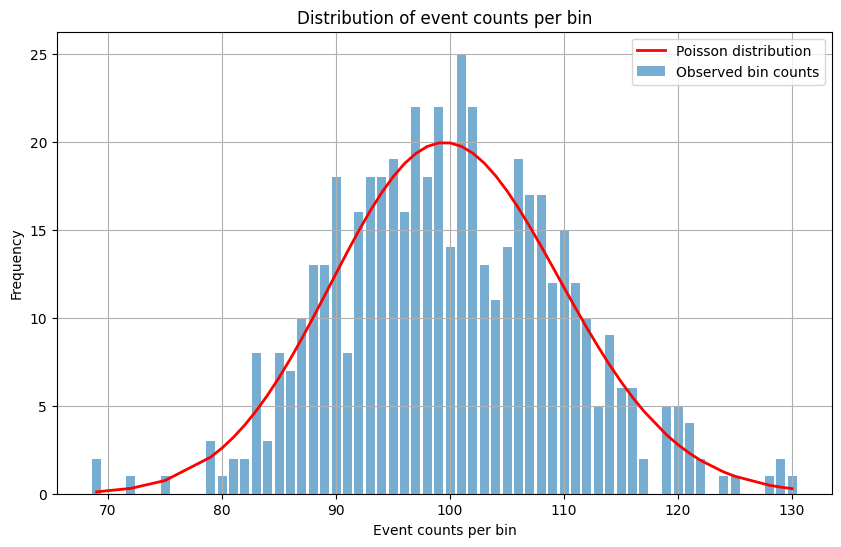


 *==* Results PoissonProcess:
Statistik der Ereignishäufigkeiten
   mean of counts per bin: 100.00
       standard deviation: 9.97


In [3]:
# statistical analysis

# (1) plot event rate in 500 bins
tbins = 500

time_hist, time_bins = np.histogram(data, bins=tbins, range=(0,data[-1]))

# Calculate statistics
bin_width = data[-1] / tbins  # Width of each bin (time interval)
mean_event_rate = Nevents / data[-1]  # Mean rate (events per time unit)
mean_counts_per_bin = mean_event_rate * bin_width  # Mean count per bin

# Plot histogram of event counts per bin
bin_centers = (time_bins[:-1] + time_bins[1:]) / 2  # Bin centers
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, time_hist, width=bin_width, alpha=0.6, label="Event rate per bin")
plt.axhline(mean_counts_per_bin, color='red', linestyle='--', label=f"Expected rate: {mean_counts_per_bin:.2f} events/bin")
plt.xlabel("Time [ZE]")
plt.ylabel("Event rate per bin")
plt.title("Event rate in fixed time bins")
plt.legend()
plt.grid()
plt.show()
# also show expectation value on graph

# (2) plot distribution of event counts per bin

# Calculate histogram of counts (frequency distribution of bin counts)
unique_counts, counts_freq = np.unique(time_hist, return_counts=True)

# Poisson distribution for comparison
mu = mean_counts_per_bin
poisson_dist = fPoisson(unique_counts, mu) * sum(counts_freq)  # Scale Poisson distribution to match total counts

# Plot distribution of bin counts
plt.figure(figsize=(10, 6))
plt.bar(unique_counts, counts_freq, alpha=0.6, label="Observed bin counts")
plt.plot(unique_counts, poisson_dist, 'r-', label="Poisson distribution", linewidth=2)
plt.xlabel("Event counts per bin")
plt.ylabel("Frequency")
plt.title("Distribution of event counts per bin")
plt.legend()
plt.grid()
plt.show()

# Print statistical results
mean_bin_count = np.mean(time_hist)  # Mean of observed counts per bin
std_bin_count = np.std(time_hist)   # Standard deviation of observed counts per bin

print('\n *==* Results PoissonProcess:')
print('Statistik der Ereignishäufigkeiten')
print(f'   mean of counts per bin: {mean_bin_count:.2f}')
print(f'       standard deviation: {std_bin_count:.2f}')


## c) Anwendung: Totzeitkorrektur für einen Detektor

Als Anwendung unserer kleinen Experimentsimulation soll nun das Ansprechverhalten eines
Detektors und dessen Einfluss auf die gemessene Ereignisrate beschrieben werden.

Nehmen wir dazu an, ein Detektor habe nach dem Registrieren eines Ereignisses zum Zeitpunkt $t_i$ 
eine Totzeit, die dazu führt, dass die Nachweiseffizienz nach der Funktion 
 $\epsilon(t) = 5./ZE · (t − t_i )$ für $(t − ti ) < 0.2 ZE$ 
von Null bis Eins ansteigt. Welche Ereignisrate misst der Detektor? Wie groß
ist der auf Grund der Totzeit notwendige Korrekturfaktor auf die gemessene Rate?

 >  **Hinweis** 
    Der Code zur Detektorsimulation benötigt ein "Gedächtnis", nämlich den Zeitpunkt
    des letzten registrierten Ereignisses. Dazu empfiehlt sich die Implementierung
    als Klasse, wie im folgenden Codeabschnitt gezeigt: 

    ``` python
    # Class defining detector properties
    class SimpleDetector:
    """a class defining a simple detector with dead time"""

    def __init__(self, tau=0.2):
    self.tlast = -1.
    # initialize variable storing argument of last call
    self.tfulleff = tau # time after which full efficiency is regained

    def Efficiency(self, dt):
    # function defining detector characteristics,
    #
    # ->  here the efficiency depending on time since last hit
    # ...
    return eff

    def Signal(self,t):
    # function returning True if signal at time t is detected
    #
    random sampling of function "Efficiency()"
    # ...
    #SigSeen = ... # True/False
    return SigSeen
    ```

    Eine Instanz der Klasse kann dann alle notwendigen Daten zum simulierten Detektor und zur
    Berechnung der Nachweiseffizienz speichern und die benötigten Funktionen bereit stellen.


In [4]:
# Implementeriung der Klasse zur Beschreibung des Detektors 

# Class defining detector properties
class SimpleDetector:
	"""a class defining a simple detector with dead time"""
	def __init__(self, tau=0.2):
		"""
		Initializeing detector
		param tau: Dead time of the detector
		"""
		self.tlast = -1.
		self.tfulleff = tau 

	def Efficiency(self, dt):
		"""
		Efficiency as a function of the time since last detection
		param dt: Time since last event
		return: Efficiency between 0 and 1
		"""
		if dt < 0 or dt > self.tfulleff:
			return 1.0 # full efficiency if outside of tau
		return 5.0 * dt # linearer anstieg von 0 bis 1 in tau

	def Signal(self,t):
		"""
		Determine if the signal is detected at t
		Random sampling of the efficiency func.
		param t: Current event time
		return: True if detected, else False
		"""
		dt = t - self.tlast
		eff = self.Efficiency(dt)
		if np.random.random_sample() < eff: # Sample efficiency func
			self.tlast = t
			return True
		return False

In [5]:
# Totzeitbestimmung
detector = SimpleDetector(tau=0.2)
T = 50000
Nevents= 50000
dt = 1.0

# ->>
waiting_times = np.random.exponential(scale=dT, size=Nevents)
event_times = np.cumsum(waiting_times)

Ndat = len(event_times)

detected_events = [detector.Signal(t) for t in event_times]
Nseen = sum(detected_events)

original_rate = Ndat/T
measured_rate = Nseen /T
EffCorr = original_rate/measured_rate

# print result:
print( 'Detector efficiency study:')
print( '  - events detected %i of %i , ' %(Nseen, Nevents ) )
print( '  - event rate %g, measured rate %g' %(original_rate, measured_rate) )
print( '      ==> efficiency correction factor: %g' %(EffCorr) )


Detector efficiency study:
  - events detected 45534 of 50000 , 
  - event rate 1, measured rate 0.91068
      ==> efficiency correction factor: 1.09808


---
# Aufgabe 2: Poisson-Likelihood <a id="Aufgabe2"></a>
---

In der ersten Aufgabe beschäftigen Sie sich mit einem vermutlich bereits bekanntem Beispiel aus dem Praktikum: Sie haben eine radioaktive Quelle erhalten und messen elektronisch die Klicks eines Geiger-Müller-Zählrohrs in aufeinanderfolgenden, gleich langen Zeitintervallen. Die Messdaten haben Sie in der Datei *Geiger_Zaehler.txt* abgespeichert und wollen nun für die weitere Auswertung die Anzahl der radioaktiven Zerfälle pro Zeitintervall bestimmen. 

Bei der Auswertung der Daten erinnern Sie sich an die Vorlesung *Rechnernutzung* und die Parameterschätzung mithilfe der Maximum-Likelihood-Methode und beschließen, statt *kafe2* zu nutzen, die gesuchte Zahl selbst abzuschätzen. Sie schauen zurück in die Folien der Vorlesung und entdecken die Funktion

$$ 
L\left(\left\{x_i\right\}|a\right)=\prod_{i\leq n}f\left(x_i,a\right).
$$

Sie erinnern sich daran, dass $\left\{x_i\right\}$ ihre Messungen sind, $f(x,a)$ die zugrunde liegende Wahrscheinlichkeitsdichte und $a$ der gesuchte Parameter ist.

## a) Likelihoodfunktion

Im ersten Aufgabenteil überprüfen Sie graphisch die Form der Likelihoodfunktion.
> Frage: Warum ist es gerechtfertig die Poissonverteilung als zugrunde liegende Wahrscheinlichkeitsdichte für den Ausgang des Zählexperiments zu wählen? Welche Abweichungen von der Annahme gibt es beim Aufbau und der Messung?

->> Antwort:  
Seltene Ereignisse: Die Poissonverteilung modelliert die Wahrscheinlichkeit, dass eine bestimmte Anzahl von Ereignissen in einem festen Zeitraum oder Bereich auftritt, wobei die Ereignisse selten und unabhängig voneinander sind.

Konstante Rate: Die mittlere Rate $v$ (Erwartungswert der Ereignisse pro Zeitintervall) muss konstant sein.

Unabhängige Ereignisse: Die Wahrscheinlichkeit für ein Ereignis darf nicht durch das Auftreten anderer Ereignisse beeinflusst werden.

Implementieren Sie die Likelihoodfunktion $L\left(\left\{x_i\right\}|a\right)$. Es bietet sich an, die Wahrscheinlichkeitsdichte als Argument der Funktion zu übergeben. Denken Sie daran, dass Sie einen gewissen Parameterereich abdecken müssen. Es bietet sich also an nicht nur $x$, sondern auch $a$ als Array zu behandeln.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import pandas

In [7]:
# Poisson distribution
def fPoisson(x, nu_P):
    k=np.around(x)
    return (nu_P**k) / np.exp(nu_P) / sp.gamma(k+1.)

# Likelihood function
def Likelihood(x, a, func= fPoisson):
    """
    Compute the likelihood L({x_i} | a) for a given parameter array a.
    param x: Array of observed data points.
    param a: Array of parameters to evaluate the likelihood.
    param func: The probability density function (e.g., Poisson, Gaussian).
    return: Array of likelihood values for each parameter in a.
    """
    likelyhoods = []
    for _ in a:
        L = np.prod(func(x, _))
        likelyhoods.append(L)
    return likelyhoods
# ->>    

Betrachten Sie nun die Likelihoodfunktion für eine steigende Zahl an Messergebnissen $L\left(\left\{x_i\right\}|a\right)$. Stellen Sie dafür die Likelihoodfunktion für $a$ im Intervall $[2,9]$ dar für
* nur den ersten Messwert,
* den ersten und den zweiten Messwert,
* die ersten 10 Messwerte,
* die ersten 100 Messwerte.

Sie können mithilfe von *np.loadtxt("filename")* die Messdaten aus dem Verzeichnis laden, indem Sie das Notebook ausführen. Sollten Sie also das Notebook von ihrem eigenen PC in der Jupyter-Umgebung des SCC-Jupyter-Servers laden oder lokal auf Ihrem Rechner arbeiten, denken Sie daran, zuerst die Datei *Geiger_Zaehler.txt* herunterzuladen.

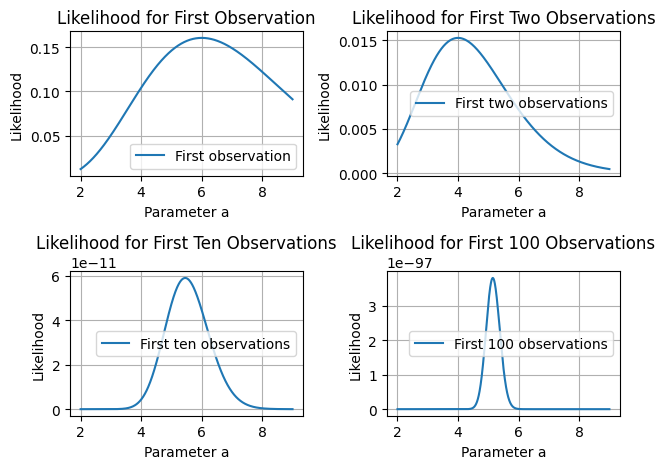

In [8]:
#->>  your code comes here 
# load observations
meassurement = np.loadtxt('Geiger_Zaehler.txt', dtype= int)

# create parameter intervall
a = np.linspace(2, 9, 1000, True)
# list for desired observation numbers

first = meassurement[0]
second = meassurement[0:2]
tenth = meassurement[0:11]
hundredth = meassurement[0:101]

# make plots

likelihood_first = Likelihood(first, a, fPoisson)
likelihood_second = Likelihood(second, a, fPoisson)
likelihood_tenth = Likelihood(tenth, a, fPoisson)
likelihood_hundredth = Likelihood(hundredth, a, fPoisson)

# Plot for the first observation
plt.subplot(2, 2, 1)
plt.plot(a, likelihood_first, label="First observation")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Observation")
plt.legend()
plt.grid()

# Plot for the first two observations
plt.subplot(2, 2, 2)
plt.plot(a, likelihood_second, label="First two observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Two Observations")
plt.legend()
plt.grid()

# Plot for the first ten observations
plt.subplot(2, 2, 3)
plt.plot(a, likelihood_tenth, label="First ten observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Ten Observations")
plt.legend()
plt.grid()

# Plot for the first 100 observations
plt.subplot(2, 2, 4)
plt.plot(a, likelihood_hundredth, label="First 100 observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First 100 Observations")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




> Frage: Erläutern Sie das Verhalten des Maximums der Likelihoodfunktion. Schätzen Sie den Wert des gesuchten Paramters ab.

->> Antwort:

Mit steigender Anzahl der Beobachtungen $N$ wird die Likelihoodkurve schmaler, und das Maximum wird besser definiert.

Der Parameterwert, der das Maximum der Likelihoodfunktion liefert, nähert sich dem wahren Wert des Parameters $a$ immer genauer an.

## b) Negative Log-Likelihood

In der Praxis verwendet anstelle von $L$ man die **Negative Log Likelihood (NLL)**

Beachten Sie die $y$-Skala bzw. den Wertebereich der Likelihoodfunktion für die vier verschiedenen Anzahlen an Messpunkten. Für eine große Anzahl an Messpunkten nimmt die Funktion immer kleinere Werte an. Eine Logarithmierung des Ausdruck vereinfacht nicht nur die  mathematische Analyse, sondern hilft auch numerisch, da das Produkt einer großen Anzahl kleiner Wahrscheinlichkeiten die numerische Genauigkeit des Computers für Fließkommaoperationen leicht unterschreiten kann, und dies wird gelöst, indem stattdessen die effizientere Summe der natürlichen Logarithmen der Wahrscheinlichkeiten ("Log Likelihood") berechnet wird. Statt nach dem Maximum der Likelihoodfunktion zu suchen, wird häufig nach dem Minimum der negativen Log Likelihood (NLL) gesucht. 

$$ 
-\ln\left(L\left(\left\{x_i\right\}|a\right)\right)=-\sum_{i\leq n}\ln\left(f\left(x_i,a\right)\right).
$$

Wiederholen Sie den ersten Aufgabenteil mit der NLL-Methode. Implementieren Sie dazu eine neue Funktion, die die NLL ausgibt. Betrachten Sie denselben Parameterbereich, aber diesmal für 
* nur den ersten Messwert,
* den ersten und den zweiten Messwert,
* die ersten 10 Messwerte,
* **alle Messwerte** statt nur 100 Messwerte.

Stellen Sie die $-\ln\left(L\left(\left\{x_i\right\}|a\right)\right)$ jeweils grafisch dar.

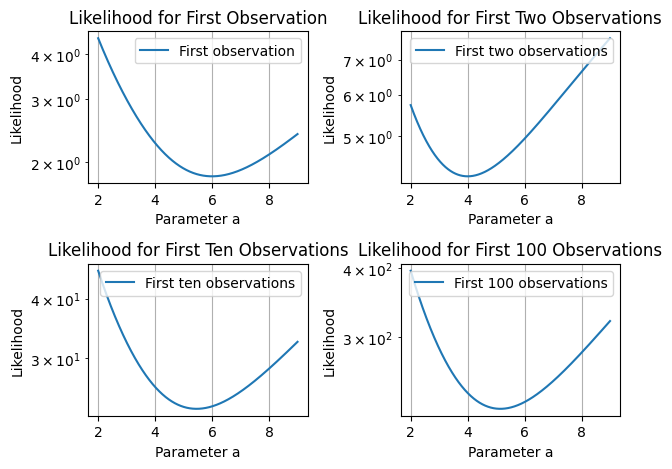

In [9]:
# ->> your code, please !

# legative Log Likelihood function
def NLL(x, a, func, *args, **kwargs):
    """
    Compute the likelihood L({x_i} | a) for a given parameter array a.
    param x: Array of observed data points.
    param a: Array of parameters to evaluate the likelihood.
    param func: The probability density function (e.g., Poisson, Gaussian).
    return: Array of likelihood values for each parameter in a.
    """
    likelyhoods = []
    for _ in a:
        L = -np.sum(np.log(func(x, _)))
        likelyhoods.append(L)
    return likelyhoods
# make plots

NLL_first = NLL(first, a, fPoisson)
NLL_second = NLL(second, a, fPoisson)
NLL_tenth = NLL(tenth, a, fPoisson)
NLL_hundredth = NLL(hundredth, a, fPoisson)

# Plot for the first observation
plt.subplot(2, 2, 1)
plt.plot(a, NLL_first, label="First observation")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Observation")
plt.legend()
plt.grid()
plt.yscale('log')

# Plot for the first two observations
plt.subplot(2, 2, 2)
plt.plot(a, NLL_second, label="First two observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Two Observations")
plt.legend()
plt.grid()
plt.yscale('log')

# Plot for the first ten observations
plt.subplot(2, 2, 3)
plt.plot(a, NLL_tenth, label="First ten observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First Ten Observations")
plt.legend()
plt.grid()
plt.yscale('log')

# Plot for the first 100 observations
plt.subplot(2, 2, 4)
plt.plot(a, NLL_hundredth, label="First 100 observations")
plt.xlabel("Parameter a")
plt.ylabel("Likelihood")
plt.title("Likelihood for First 100 Observations")
plt.legend()
plt.grid()
plt.yscale('log')

plt.tight_layout()
plt.show()


## c) Parameterschätzung

Bestimmen Sie nun den gesuchten Parameter und schätzen Sie dessen $1\sigma$-Konfidenzintervall ab, indem Sie die *asymmetrischen* Grenzen für die Unsicherheit angeben.

Für den ersten Schritt kann die *NumPy*-Methode *np.argmin()* hilfreich sein. Sie gibt den Index des Arrayeintrags am Minimum aus. <br>
Den zweiten Schritt erhalten Sie, indem Sie diejenigen Punkte finden, deren NLL-Wert um $1/2$ größer sind als der des Maximums. Das $1\sigma$-Konfidenzintervall entspricht dann dem Wertebereich $[\hat{a}-\Delta^-,\hat{a}+\Delta^+]$. Die üblich Angabe für den besten Schätzwert erfolgt dann über folgende Darstellung:
$$\hat{a}^{+\Delta^+}_{-\Delta^-}.$$
Hier eine schnelle Illustration:

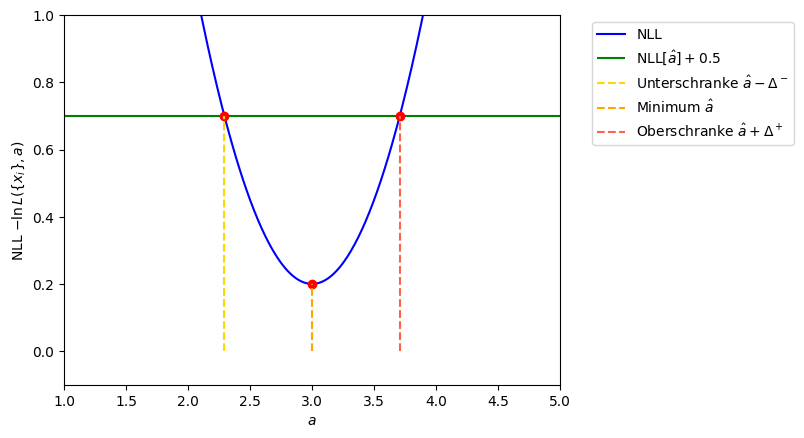

In [10]:
x = np.linspace(0, 10, 1000)
y = (x - 3)**2 + 0.2

dots_x = [3 - 1/np.sqrt(2), 3, 3 + 1/np.sqrt(2)]
dots_y = [0.7, 0.2, 0.7]

plt.plot(x, y, 'b-', label='NLL')
plt.hlines(0.7, 1, 5, color='green', label=r'NLL$[\hat{a}]+0.5$')
plt.plot(dots_x, dots_y, 'ro')

colors = ['gold', 'orange', 'tomato']
labels = [r'Unterschranke $\hat{a}-\Delta^-$', r'Minimum $\hat{a}$', r'Oberschranke $\hat{a}+\Delta^+$']
for i in range(3):
    plt.vlines(dots_x[i], 0, dots_y[i], linestyle='dashed', color=colors[i], label=labels[i])

plt.ylim(-0.1, 1)
plt.xlim(1, 5)
plt.xlabel(r'$a$')
plt.ylabel(r'NLL $-\ln L\left(\left\{x_i\right\},a\right)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Es bietet sich an die Zwischenschritte als Funktion zu implementieren, damit sie erneut verwendet werden können.

In [11]:
from IPython.display import display, Markdown

# ->> your own code
def find_estimate(nlLH, par):
	"""
    Find the best estimate and the confidence intervall.
    :param nlLH: Array der negativen Log-Likelihood-Werte
    :param par: Array der Parameterwerte
    :return: Schätzwert (a_best) und unsymmetrische Unsicherheiten (Delta- und Delta+)
    """
	idx_min = np.argmin(nlLH)
	a_best = par[idx_min]
	nll_min = nlLH[idx_min]
	delta_nll = 0.5

	# Left boundry
	a_left = par[np.where(nlLH[:idx_min] >= nll_min + delta_nll)[0][-1]]

	# Right boundry
	a_right = par[np.where(nlLH[idx_min:] >= nll_min + delta_nll)[0][0] + idx_min]

	return a_best, a_best - a_left, a_right - a_best

	

a_best, a_left, a_right = find_estimate(NLL(hundredth, a, fPoisson), a)
display(Markdown(f'Der gesuchte Parameter konnte geschätzt werden zu $a = {a_best:.3f}^{{+{a_right:.3f}}}_{{-{a_left:.3f}}}$'))

Der gesuchte Parameter konnte geschätzt werden zu $a = 5.146^{+0.238}_{-0.224}$